In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

$$
f(x)=2sin(x)-x+1
$$

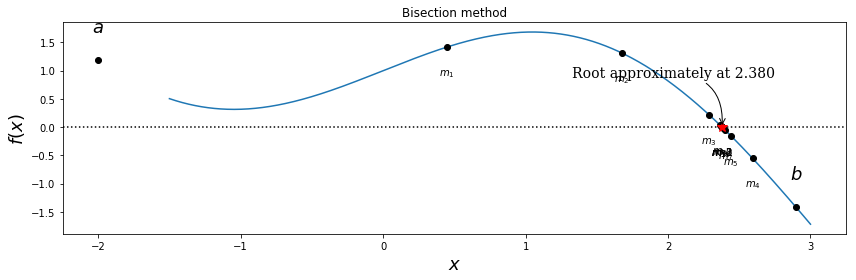

In [2]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: 2*np.sin(x)-x+1
tol = 0.001
a, b = -2, 2.9
x = np.linspace(-1.5, 3, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2,-1,0,1,2,3])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

fig.tight_layout()
#fig.savefig('ch5-nonlinear-bisection.pdf')

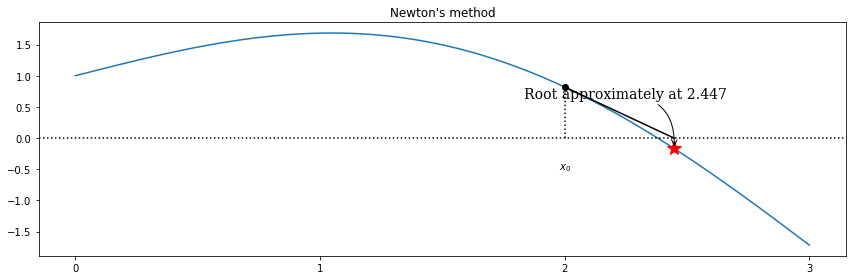

In [3]:
# define a function, desired tolerance and starting point xk
tol =0.001
xk = 2

s_x = sympy.symbols("x")
s_f = 2*sympy.sin(s_x)-s_x + 1

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(0, 3, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([0, 1, 2,3])
fig.tight_layout()
#fig.savefig('ch5-nonlinear-newton.pdf')

In [4]:
f1=lambda x:2*np.sin(x)-x+1
res = optimize.fsolve(f1,1)
res

array([2.38006127])

$$
3 x_1 + 2 x_2 = 3
$$

$$
  x_1 - 2 x_2 = 5
$$

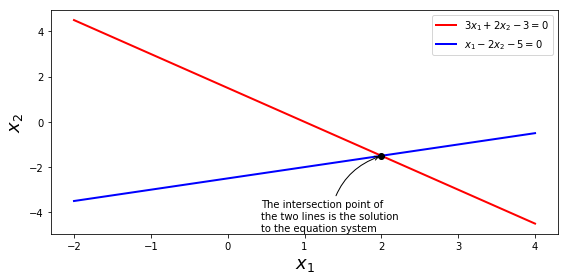

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-2, 4, 100)

x2_1 = (3 - 3 * x1)/2
x2_2 = (x1-5)/2

ax.plot(x1, x2_1, 'r', lw=2, label=r"$3x_1+2x_2-3=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$x_1-2x_2-5=0$")

A = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()
#fig.savefig('ch5-linear-systems-simple.pdf')

In [6]:
A = sympy.Matrix([[3, 2], [1, -2]])
b = sympy.Matrix([3, 5])

In [7]:
A.rank()

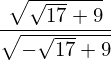

In [8]:
A.condition_number()

In [9]:
sympy.N(_)

In [10]:
A.norm()

In [11]:
L, U, P = A.LUdecomposition()

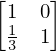

In [12]:
L

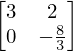

In [13]:
U

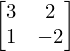

In [14]:
L * U

In [15]:
x = A.solve(b)

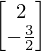

In [16]:
x